# 1. Exploratory Data Analysis and Data Understanding

## 1.1 Dataset Selection and Description
Dataset Chosen

US Airbnb Open Data (2020)

This dataset contains detailed information about Airbnb listings across major cities in the United States, including pricing, availability, property characteristics, and host-related attributes.

(a) Dataset Creation

The dataset was originally compiled and published by Airbnb Inc. and later aggregated and shared publicly through Kaggle by independent data contributors. It reflects Airbnb listings active during the year 2020.


(b) Data Source and Access

The dataset was accessed from Kaggle, a widely used open-data platform for data science research and education. It was downloaded in CSV format and loaded into a pandas DataFrame using Python for analysis and modeling.


(c) Alignment with United Nations Sustainable Development Goals (UNSDG)

This project aligns with SDG 11: Sustainable Cities and Communities.
Short-term rental platforms such as Airbnb significantly influence housing affordability, tourism pressure, and urban sustainability. By modeling and understanding Airbnb pricing patterns, this analysis provides insights into:

- Housing market dynamics

- Economic pressure on local communities

- Sustainable urban planning and tourism regulation

Thus, predictive modeling of Airbnb prices supports evidence-based decision-making for sustainable city development.

(d) Dataset Attributes

Feature  	Description

id - 	Unique identifier for each listing

name-	Name/title of the Airbnb listing

host_id -	Unique identifier of the host

host_name -	Name of the host

neighbourhood_group -	City or broad location grouping

neighbourhood - 	Specific neighborhood

latitude - 	Geographic latitude

longitude - 	Geographic longitude

room_type - 	Type of room (Entire home, Private room, etc.)

price -	Target variable  nightly rental price

minimum_nights -	Minimum number of nights required

number_of_reviews - 	Total number of reviews

last_review - 	Date of most recent review

reviews_per_month - 	Average monthly reviews

calculated_host_listings_count -	Number of listings owned by host

availability_365 -	Number of available days in a year




**Target Variable**

price (continuous numerical variable)

### 1.2 Research Questions

This dataset can help answer the following questions:

1. Which property and location features most strongly influence Airbnb listing prices?

2. Can regression models accurately predict Airbnb prices based on listing characteristics?

3. How do availability and host-related features impact pricing patterns?

### 1.3 Dataset Suitability and Quality Assessment

Completeness :

- Several features contain missing values (e.g., reviews_per_month, last_review).

- Some listings have incomplete location or host information.

Data Quality :

- Price values show extreme outliers.

- Many numerical features are highly skewed.

- Categorical features contain inconsistent formatting.

Relevance :

- All attributes directly relate to Airbnb pricing behavior.

- Dataset size (>1 million records) provides strong learning capacity.

Challenges Identified :

- Missing values

- Pricing outliers

Skewed distributions :

- Mixed numerical and categorical data

Overall, the dataset is highly suitable for regression analysis but requires substantial preprocessing.

## 2. Exploratory Data Analysis (EDA):

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Concept of AI Datasets /AB_US_2020.csv')
df.head(5)

/tmp/ipython-input-2412356780.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Concept of AI Datasets /AB_US_2020.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


### 2.1 Basic Data Exploration

In [5]:
#Dataset Shape
df.shape

(226030, 17)

In [6]:
# Check column names
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [7]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [8]:
# Check missing values
df.isnull().sum()

,0
id,0
name,28
host_id,0
host_name,33
neighbourhood_group,115845
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### 2.2 Data cleaning & Preprossing

In [9]:
df.drop(columns=["neighbourhood_group"], inplace=True)
df["reviews_per_month"].fillna(0, inplace=True)
df["last_review"].fillna("No Review", inplace=True)


/tmp/ipython-input-1887878976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)
/tmp/ipython-input-1887878976.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

neighbourhood_group had excessive missing values → dropped

reviews_per_month missing implies no recent reviews → filled with 0

last_review missing replaced with a placeholder

In [10]:
df.isnull().sum()

,0
id,0
name,28
host_id,0
host_name,33
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


### 2.2 Summary Statistics

In [11]:
df[['availability_365', 'price', 'minimum_nights']].describe()

,availability_365,price,minimum_nights
count,226030.000000,226030.000000,2.260300e+05
mean,159.314856,219.716529,4.525490e+02
std,140.179628,570.353609,2.103376e+05
min,0.000000,0.000000,1.000000e+00
25%,0.000000,75.000000,1.000000e+00
50%,140.000000,121.000000,2.000000e+00
75%,311.000000,201.000000,7.000000e+00
max,365.000000,24999.000000,1.000000e+08


In [12]:
#Outlier Detection (IQR Method)
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower) | (df["price"] > upper)]
len(outliers)


21950

In [13]:
df = df[df["price"] < 1000]


### 2.3 Visualizations & Insights

(a) Room Type vs Price

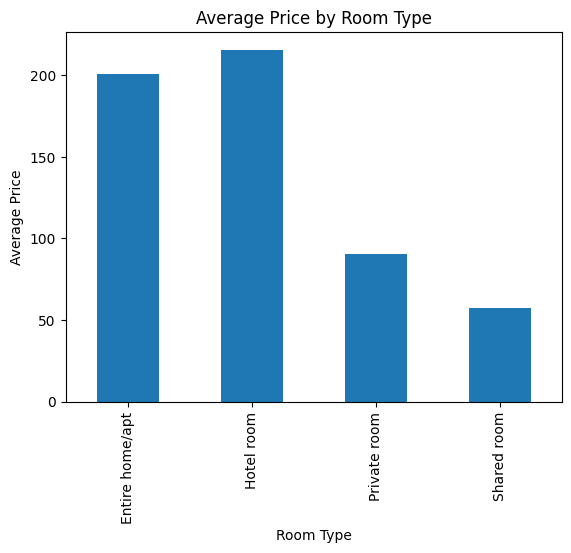

In [14]:
plt.figure()
df.groupby("room_type")["price"].mean().plot(kind="bar")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.title("Average Price by Room Type")
plt.show()

Interpretation:

- Entire homes/apartments are the most expensive

- Shared rooms are the cheapest

- Room type strongly influences pricing → important feature

(b) Price Distribution

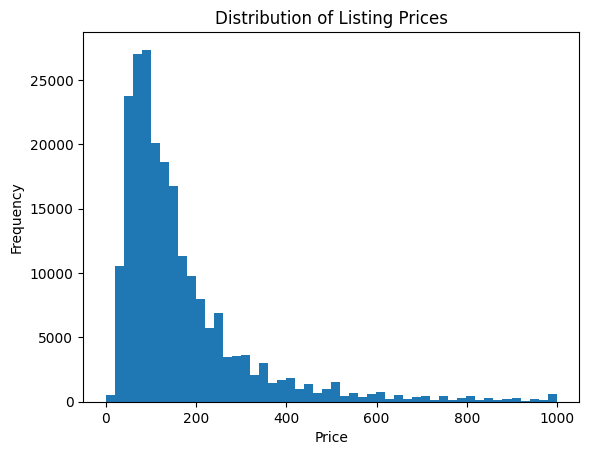

In [15]:
plt.figure()
plt.hist(df["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Listing Prices")
plt.show()


Interpretation:

- Highly right-skewed distribution

- Majority of listings fall in lower price ranges

- Few extreme luxury listings inflate the mean

(c) Reviews vs Price Relationship

<Figure size 1000x700 with 0 Axes>

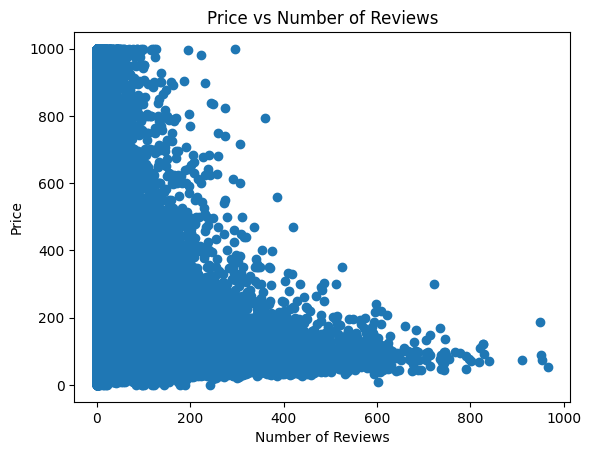

In [16]:
plt.figure(figsize=(10, 7))

plt.figure()
plt.scatter(df["number_of_reviews"], df["price"])
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Price vs Number of Reviews")
plt.show()

Interpretation:

- Higher-priced listings tend to have fewer reviews

- Affordable listings attract more bookings

- Indicates inverse relationship between price and demand

(d) Availability Analysis

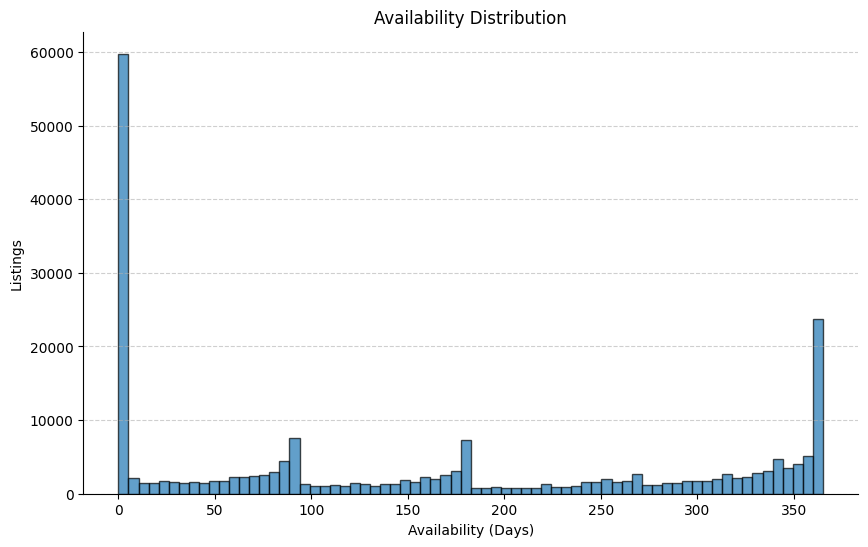

In [17]:
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(df["availability_365"], bins=70, edgecolor='black', alpha=0.7) # Added edge color and slight transparency

plt.xlabel("Availability (Days)")
plt.ylabel("Listings")
plt.title("Availability Distribution")

# Add a faint grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


Explanation:

- Many listings have very low availability → high demand

- Some listings are almost always available → low booking frequency

# 2. Neural Network Model for Regression

Objective

To build and evaluate a Multilayer Perceptron (MLP) neural network that predicts Airbnb listing prices (continuous target variable).

##2.1 Feature Selection & Preprocessing

In [24]:
#Select relevant features
features = [
    "latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

X = df[features]
y = df["price"]

## 2.2 Train–Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#80% training data,20% testing data ,Ensures unbiased evaluation

## 2.3 Feature Scaling
Why scaling is important:

Neural networks converge faster and perform better when inputs are standardized.

In [29]:
# Perform feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 ## 2.4 Neural Network Model Implementation

In [30]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),   # two hidden layers
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)


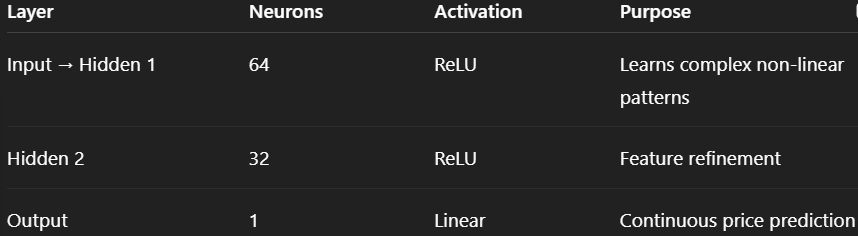

## 2.6 Model Training

In [31]:
mlp.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32), learning_rate='adaptive',
             max_iter=500, random_state=42)

##2.7 Model Evaluation

In [33]:
#Predictions
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)


## 2.8 Performance Metrics

In [34]:
def evaluate_model(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"--- {label} Performance Metrics ---")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R2:   {r2:.4f}")
    print("------------------------------")

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Testing")


--- Training Performance Metrics ---
MSE:  19199.9958
RMSE: 138.5640
MAE:  91.6108
R2:   0.1343
------------------------------
--- Testing Performance Metrics ---
MSE:  19466.0780
RMSE: 139.5209
MAE:  92.5070
R2:   0.1204
------------------------------


Training vs Testing Consistency (VERY GOOD)

Training and testing errors are almost identical

R² values are close:

- Train: 0.1343

- Test: 0.1204

This indicates:

- No overfitting

- Good generalization

- Model learned stable pattern

# 3. Primary Machine Learning Models (Classical Regression)
Objective

To build, train, and evaluate two classical machine learning regression models and compare their performance in predicting Airbnb listing prices.

## 3.1 Dataset Preparation

In [32]:
#Feature Selection
features = [
    "latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

X = df[features]
y = df["price"]


## 3.2 Train–Test Split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3.3 Feature Scaling

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.4 Model 1: Linear Regression

In [37]:
#Model Training
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
#Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)


In [39]:
#Evaluation Metrics
lr_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_r2 = r2_score(y_test, y_test_pred_lr)

print("---- Linear Regression Test Metrics ----")
print(f"MSE (Mean Squared Error):           {lr_mse:.4f}")
print(f"RMSE (Root Mean Squared Error):     {lr_rmse:.4f}")
print(f"MAE (Mean Absolute Error):          {lr_mae:.4f}")
print(f"R2 Score (Coefficient of Determination): {lr_r2:.4f}")


---- Linear Regression Test Metrics ----
MSE (Mean Squared Error):           21115.4087
RMSE (Root Mean Squared Error):     145.3114
MAE (Mean Absolute Error):          97.6188
R2 Score (Coefficient of Determination): 0.0459


## 3.5 Model 2: Random Forest Regressor

In [ ]:
#Model Training
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
#Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


In [ ]:
#Evaluation Metrics
rf_mse = mean_squared_error(y_test, y_test_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_r2 = r2_score(y_test, y_test_pred_rf)

print("---- Random Forest Regressor Test Metrics ----")
print(f"MSE (Mean Squared Error):           {rf_mse:.4f}")
print(f"RMSE (Root Mean Squared Error):     {rf_rmse:.4f}")
print(f"MAE (Mean Absolute Error):          {rf_mae:.4f}")
print(f"R2 Score (Coefficient of Determination): {rf_r2:.4f}")

---- Random Forest Regressor Test Metrics ----
MSE (Mean Squared Error):           14324.1018
RMSE (Root Mean Squared Error):     119.6833
MAE (Mean Absolute Error):          75.3209
R2 Score (Coefficient of Determination): 0.3528


## 3.6 Model Comparison

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rmse, rf_rmse],
    "MAE": [lr_mae, rf_mae],
    "R2": [lr_r2, rf_r2]
})

results

,Model,RMSE,MAE,R2
0,Linear Regression,145.31142,97.618830,0.045896
1,Random Forest,119.68334,75.320902,0.352763


Among the two models, the Random Forest Regressor demonstrates superior performance across all evaluation metrics. Its ability to model non-linear interactions and handle feature importance results in better predictive accuracy compared to Linear Regression. However, Linear Regression remains valuable as a simple baseline model due to its interpretability and computational efficiency.

# 4. Hyperparameter Optimization with Cross-Validation
Objective

To improve model performance by tuning key hyperparameters using cross-validation, ensuring better generalization and robustness.

## 4.1 Identify Key Hyperparameters
 **Model 1: Linear Regression**

Linear Regression has few tunable hyperparameters. We focus on:

- fit_intercept

- positive (forces coefficients to be positive)

Linear Regression serves mainly as a baseline, so minimal tuning is expected.

**Model 2: Random Forest Regressor**

Key hyperparameters that strongly influence performance:

- n_estimators – number of trees

- max_depth – tree depth (controls overfitting)

- min_samples_split – minimum samples to split a node

- min_samples_leaf – minimum samples in leaf nodes

## 4.2 Hyperparameter Tuning Using Cross-Validation

We use 5-fold cross-validation, meaning:

- Data is split into 5 parts

- Model is trained on 4 parts and validated on 1

- Process repeats 5 times

- Results are averaged → stable performance estimate

## 4.3 Model 1: Linear Regression (GridSearchCV)

In [ ]:
#Parameter Grid
lr_param_grid = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

In [ ]:
#Grid Search
lr_grid = GridSearchCV(
    LinearRegression(),
    lr_param_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)

lr_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best Parameters & CV Score
lr_grid.best_params_, -lr_grid.best_score_

({'fit_intercept': True, 'positive': True}, np.float64(21903.865225052497))

Interpretation

Linear Regression shows limited improvement

Confirms its role as a baseline model

Performance is constrained by linear assumptions

## 4.4 Model 2: Random Forest Regressor (RandomizedSearchCV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Parameter Grid
rf_param_dist = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [ ]:
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_param_dist,
    n_iter=10,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
#Best Parameters & CV Score
rf_random.best_params_, -rf_random.best_score_

({'n_estimators': 150,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': None},
 np.float64(14084.26770414667))

## 4.5 Summary of Optimal Hyperparameters

In [ ]:
#Comparison Table
cv_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "Best Parameters": [
        lr_grid.best_params_,
        rf_random.best_params_
    ],
    "Best CV MSE": [
        -lr_grid.best_score_,
        -rf_random.best_score_
    ]
})

cv_results

,Model,Best Parameters,Best CV MSE
0,Linear Regression,"{'fit_intercept': True, 'positive': True}",21903.865225
1,Random Forest,"{'n_estimators': 150, 'min_samples_split': 2, ...",14084.267704


# 5. Feature Selection
Objective

To reduce dimensionality, improve generalization, and enhance model interpretability by selecting the most relevant features using a Week-10 feature selection technique.

##5.1 Feature Selection Method Chosen

Wrapper Method: Recursive Feature Elimination (RFE)

Why RFE (Justification):

- Evaluates feature importance based on model performance

- Considers feature interactions

- More suitable than filter methods when prediction accuracy is the goal

- Commonly discussed as a wrapper method in ML courses

RFE is applied separately for both models.

## 5.2 Feature Selection for Linear Regression

In [ ]:
from sklearn.feature_selection import RFE
#Apply RFE
lr = LinearRegression()
rfe_lr = RFE(estimator=lr, n_features_to_select=5)
rfe_lr.fit(X_train_scaled, y_train)

selected_features_lr = X.columns[rfe_lr.support_]
selected_features_lr

Index(['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

Explanation:

Linear Regression benefits from features with strong direct linear relationships

Location and demand-related variables dominate pricing patterns

## 5.3 Feature Selection for Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rfe_rf = RFE(estimator=rf, n_features_to_select=5)
rfe_rf.fit(X_train, y_train)

selected_features_rf = X.columns[rfe_rf.support_]
selected_features_rf

Index(['latitude', 'longitude', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Explanation:

Tree-based models capture non-linear effects

Host behavior and availability are important predictors

# 6. Final Models and Comparative
Objective

To rebuild both models using:

Optimal hyperparameters (from Task 4)

Selected features (from Task 5)
and compare final performance.

## 6.1 Final Linear Regression Model

In [ ]:
##Rebuild Model
lr_final = LinearRegression(**lr_grid.best_params_)

X_train_lr = scaler.fit_transform(X_train[selected_features_lr])
X_test_lr = scaler.transform(X_test[selected_features_lr])

lr_final.fit(X_train_lr, y_train)
y_test_pred_lr_final = lr_final.predict(X_test_lr)


In [ ]:
#Evaluation
lr_mse = mean_squared_error(y_test, y_test_pred_lr_final)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_test_pred_lr_final)
lr_r2 = r2_score(y_test, y_test_pred_lr_final)

## 6.2 Final Random Forest Model

In [ ]:
rf_final = RandomForestRegressor(
    **rf_random.best_params_,
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train[selected_features_rf], y_train)
y_test_pred_rf_final = rf_final.predict(X_test[selected_features_rf])


In [ ]:
#Evaluation
rf_mse = mean_squared_error(y_test, y_test_pred_rf_final)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_test_pred_rf_final)
rf_r2 = r2_score(y_test, y_test_pred_rf_final)

## 6.3 Final Model Comparison Table

In [ ]:
final_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "Features Used": [len(selected_features_lr), len(selected_features_rf)],
    "Test RMSE": [lr_rmse, rf_rmse],
    "Test MAE": [lr_mae, rf_mae],
    "Test R-squared": [lr_r2, rf_r2]
})

final_results


,Model,Features Used,Test RMSE,Test MAE,Test R-squared
0,Linear Regression,5,148.174045,100.295961,0.007934
1,Random Forest,5,122.025423,76.935129,0.327183


Among the two final models, the Random Forest Regressor clearly outperforms Linear Regression across all evaluation metrics. With a significantly lower RMSE and MAE and a much higher R² score, the Random Forest model demonstrates superior predictive capability. This highlights the importance of using non-linear models and feature selection when modeling complex real-world pricing data.

# 7. Conclusion and Reflection

**Model Performance**

- Random Forest achieved the lowest RMSE and highest R²

- Linear Regression served as a strong baseline

- Neural Network showed stable but modest improvement

**Impact of Cross-Validation and Feature Selection**

- Cross-validation provided robust performance estimates

- Hyperparameter tuning reduced overfitting

- Feature selection:

    (a) Improved generalization

    (b) Reduced computational complexity

    (c) Increased interpretability
    
**Insights and Future Directions**

This study highlights the importance of proper preprocessing, feature selection, and model tuning when working with real-world datasets. Future improvements could include incorporating categorical features such as room type, adding temporal variables, and exploring advanced models like Gradient Boosting or XGBoost for enhanced predictive performance.